Imports and Setup

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# For better display in notebooks
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

Data Loading

In [3]:
# Try reading the dataset with different encodings
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        print(f"Trying encoding: {encoding}")
        df = pd.read_csv('../data/external/mendeley_sri_lanka_reviews.csv', encoding=encoding)
        print(f"Successfully read the file with {encoding} encoding")
        break
    except UnicodeDecodeError:
        print(f"Failed with {encoding} encoding")
        continue

Trying encoding: utf-8
Failed with utf-8 encoding
Trying encoding: latin1
Successfully read the file with latin1 encoding


Basic Dataset Information

In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
print(df.info())
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print("-" * 50)
display(df.head())

print("\nBasic statistics:")
print("-" * 50)
display(df.describe())

print("\nColumns in the dataset:")
print("-" * 50)
print(df.columns.tolist())

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16156 entries, 0 to 16155
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location_Name       16156 non-null  object
 1   Located_City        16156 non-null  object
 2   Location            16156 non-null  object
 3   Location_Type       16156 non-null  object
 4   User_ID             16156 non-null  object
 5   User_Location       16156 non-null  object
 6   User_Locale         16156 non-null  object
 7   User_Contributions  16156 non-null  int64 
 8   Travel_Date         16156 non-null  object
 9   Published_Date      16156 non-null  object
 10  Rating              16156 non-null  int64 
 11  Helpful_Votes       16156 non-null  int64 
 12  Title               16156 non-null  object
 13  Text                16156 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.7+ MB
None
Sh

,Location_Name,Located_City,Location,Location_Type,User_ID,User_Location,User_Locale,User_Contributions,Travel_Date,Published_Date,Rating,Helpful_Votes,Title,Text
0,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 1,"Dunsborough, Australia",en_US,8,2019-07,2019-07-31T07:53:21-04:00,5,1,Best nail spa in Arugam bay on the water!,I had a manicure here and it really was professional and clean. It is right on the Ocean so ver...
1,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 2,"Bendigo, Australia",en_US,4,2019-06,2019-07-21T21:50:11-04:00,4,0,Best for surfing,"Overall, it is a wonderful experience. We visited Arugam bay last month during our anniversary. ..."
2,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 3,"Melbourne, Australia",en_US,13,2019-07,2019-07-15T18:52:55-04:00,5,0,We Love Arugam Bay,"Great place to chill, swim, surf, eat, shop, have sunset cocktails, itÂs the best!!! The vibe i..."
3,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 4,"Ericeira, Portugal",en_US,4,2019-06,2019-07-03T10:32:41-04:00,5,0,Sun and waves.,Good place for surf and a few stores to going for shopping. Very good place for rest and surf. G...
4,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 5,"Pistoia, Italy",en_US,14,2019-07,2019-07-02T17:07:02-04:00,5,0,"Great swimming, surfing, great fish aznd friendly people",This place is great for surfing but even if you are not a surfer you can have a wonderful time s...



Basic statistics:
--------------------------------------------------


,User_Contributions,Rating,Helpful_Votes
count,16156.000000,16156.000000,16156.000000
mean,191.624845,4.167492,0.709458
std,500.100421,1.006840,3.672513
min,1.000000,1.000000,0.000000
25%,18.000000,4.000000,0.000000
50%,54.000000,4.000000,0.000000
75%,155.000000,5.000000,1.000000
max,9010.000000,5.000000,233.000000



Columns in the dataset:
--------------------------------------------------
['Location_Name', 'Located_City', 'Location', 'Location_Type', 'User_ID', 'User_Location', 'User_Locale', 'User_Contributions', 'Travel_Date', 'Published_Date', 'Rating', 'Helpful_Votes', 'Title', 'Text']


Review Content Analysis

In [5]:
# Analyze review text characteristics
df['text_length'] = df['Text'].str.len()
df['text_word_count'] = df['Text'].str.split().str.len()
df['title_length'] = df['Title'].str.len()
df['title_word_count'] = df['Title'].str.split().str.len()

print("Review Content Statistics:")
print("-" * 50)
print(f"Average text length: {df['text_length'].mean():.0f} characters")
print(f"Average text word count: {df['text_word_count'].mean():.0f} words")
print(f"Average title length: {df['title_length'].mean():.0f} characters")
print(f"Average title word count: {df['title_word_count'].mean():.0f} words")
print(f"\nText length range: {df['text_length'].min()} - {df['text_length'].max()} characters")
print(f"Word count range: {df['text_word_count'].min()} - {df['text_word_count'].max()} words")

Review Content Statistics:
--------------------------------------------------
Average text length: 381 characters
Average text word count: 70 words
Average title length: 25 characters
Average title word count: 4 words

Text length range: 50 - 9430 characters
Word count range: 1 - 1700 words


Text Length Visualizations

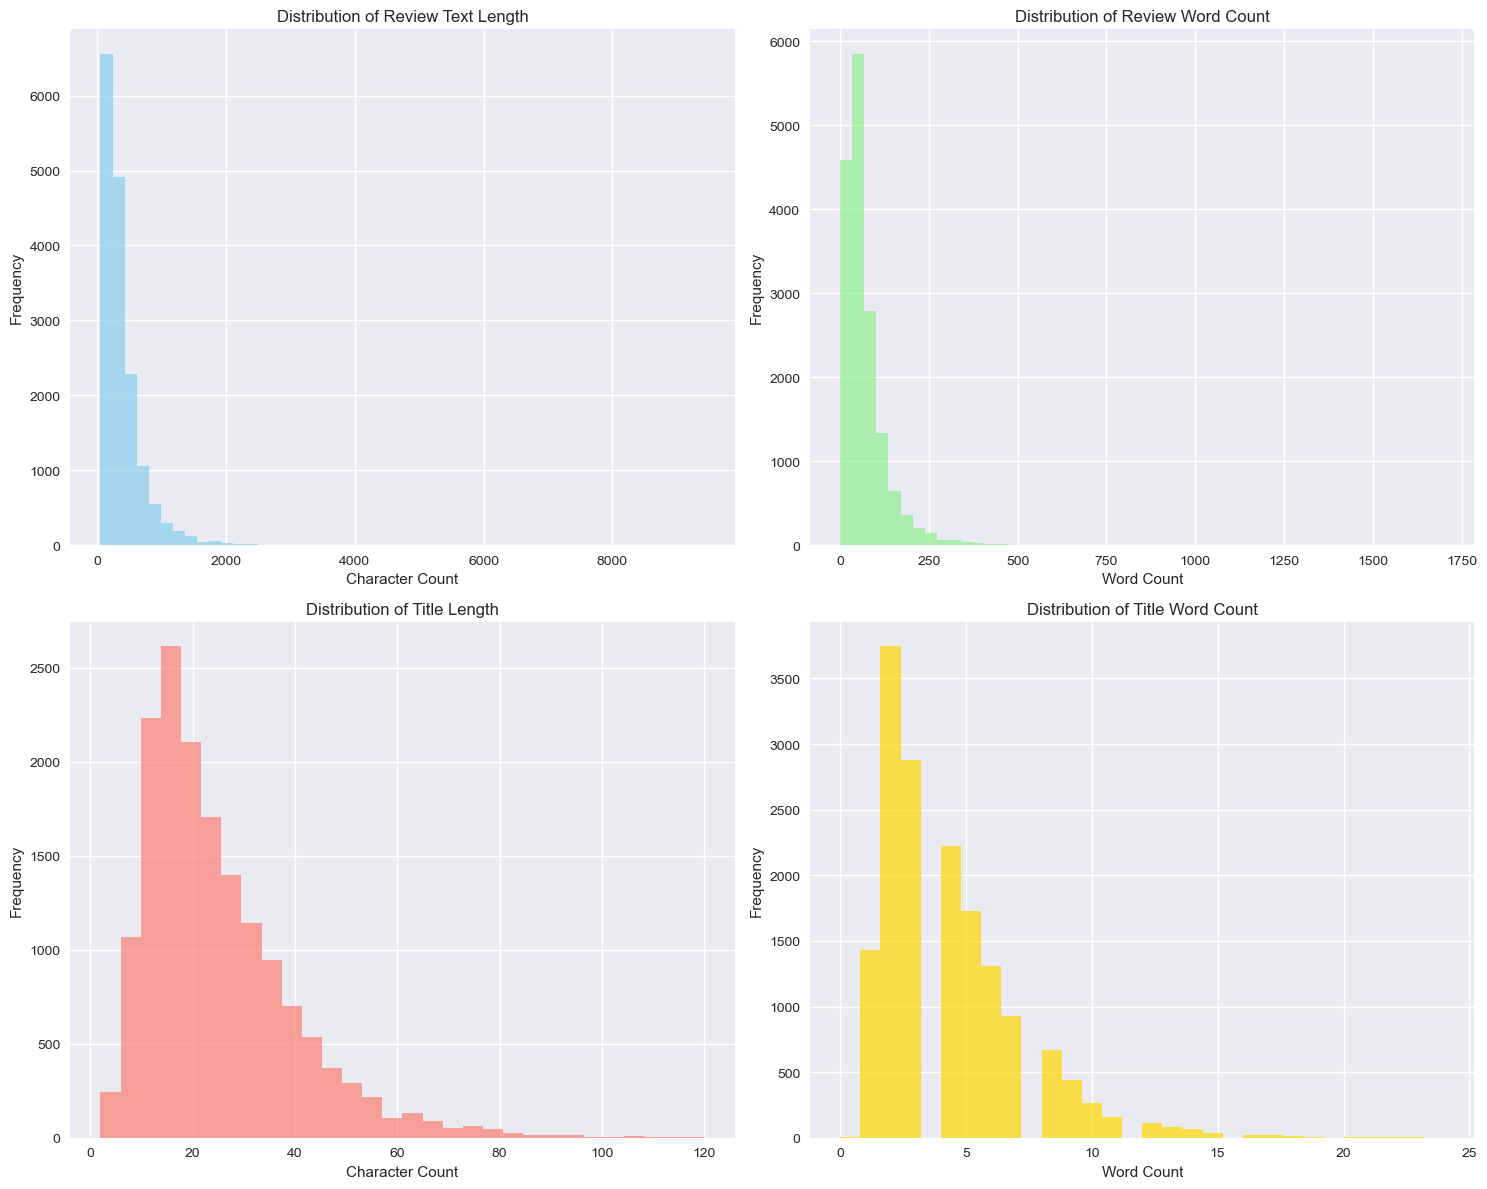

In [6]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Text length distribution
axes[0,0].hist(df['text_length'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Review Text Length')
axes[0,0].set_xlabel('Character Count')
axes[0,0].set_ylabel('Frequency')

# Word count distribution
axes[0,1].hist(df['text_word_count'], bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribution of Review Word Count')
axes[0,1].set_xlabel('Word Count')
axes[0,1].set_ylabel('Frequency')

# Title length distribution
axes[1,0].hist(df['title_length'], bins=30, alpha=0.7, color='salmon')
axes[1,0].set_title('Distribution of Title Length')
axes[1,0].set_xlabel('Character Count')
axes[1,0].set_ylabel('Frequency')

# Title word count distribution
axes[1,1].hist(df['title_word_count'], bins=30, alpha=0.7, color='gold')
axes[1,1].set_title('Distribution of Title Word Count')
axes[1,1].set_xlabel('Word Count')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Rating Analysis

In [7]:
# Analyze rating distribution
print("Rating Distribution:")
print("-" * 50)
rating_counts = df['Rating'].value_counts().sort_index()
rating_percentages = (rating_counts / len(df)) * 100

for rating, count in rating_counts.items():
    percentage = rating_percentages[rating]
    print(f"{rating} stars: {count:,} reviews ({percentage:.1f}%)")

print(f"\nAverage rating: {df['Rating'].mean():.2f}")
print(f"Median rating: {df['Rating'].median():.0f}")

Rating Distribution:
--------------------------------------------------
1 stars: 487 reviews (3.0%)
2 stars: 658 reviews (4.1%)
3 stars: 2,166 reviews (13.4%)
4 stars: 5,196 reviews (32.2%)
5 stars: 7,649 reviews (47.3%)

Average rating: 4.17
Median rating: 4


Rating Visualizations

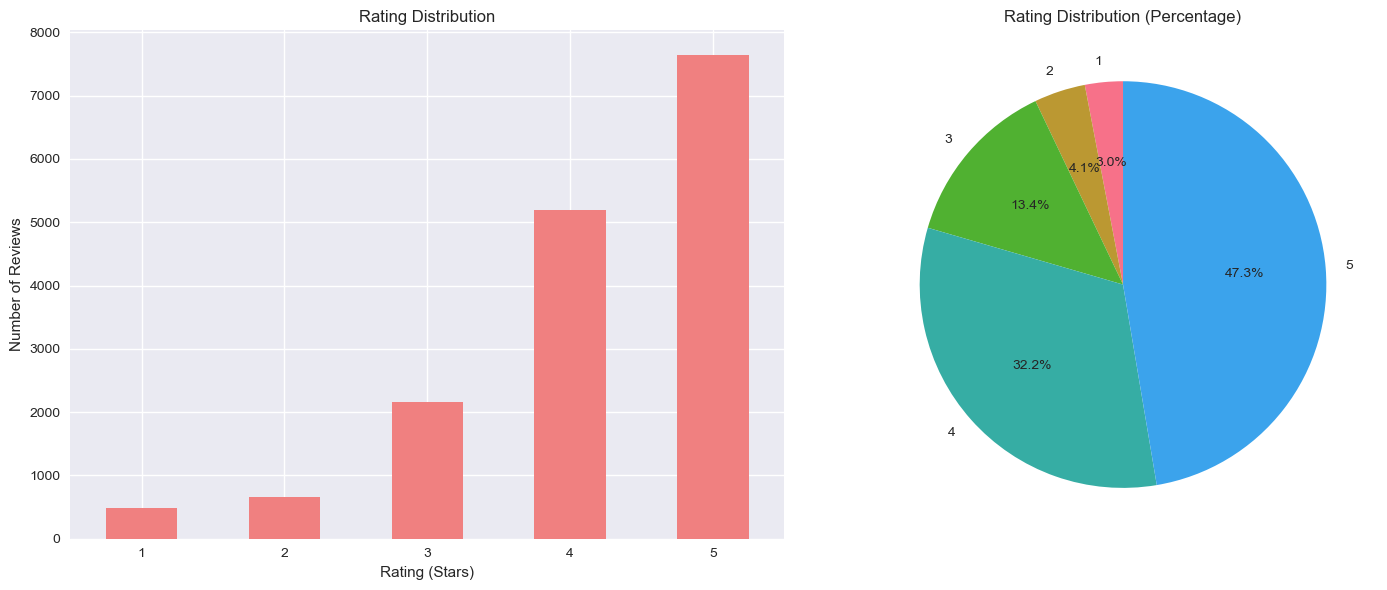

In [8]:
# Visualize rating distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
rating_counts.plot(kind='bar', ax=ax1, color='lightcoral')
ax1.set_title('Rating Distribution')
ax1.set_xlabel('Rating (Stars)')
ax1.set_ylabel('Number of Reviews')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
ax2.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Rating Distribution (Percentage)')

plt.tight_layout()
plt.show()

Location Type Analysis

In [9]:
# Analyze location types
print("Location Types:")
print("-" * 50)
location_type_counts = df['Location_Type'].value_counts()
for loc_type, count in location_type_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{loc_type}: {count:,} reviews ({percentage:.1f}%)")

print(f"\nUnique location types: {df['Location_Type'].nunique()}")

Location Types:
--------------------------------------------------
Religious Sites: 3,017 reviews (18.7%)
Beaches: 2,110 reviews (13.1%)
Farms: 1,884 reviews (11.7%)
Nature & Wildlife Areas: 1,557 reviews (9.6%)
Museums: 1,525 reviews (9.4%)
Historic Sites: 1,519 reviews (9.4%)
Gardens: 1,354 reviews (8.4%)
National Parks: 1,205 reviews (7.5%)
Waterfalls: 933 reviews (5.8%)
Bodies of Water: 839 reviews (5.2%)
Zoological Gardens: 213 reviews (1.3%)

Unique location types: 11


Location Visualization

City Analysis

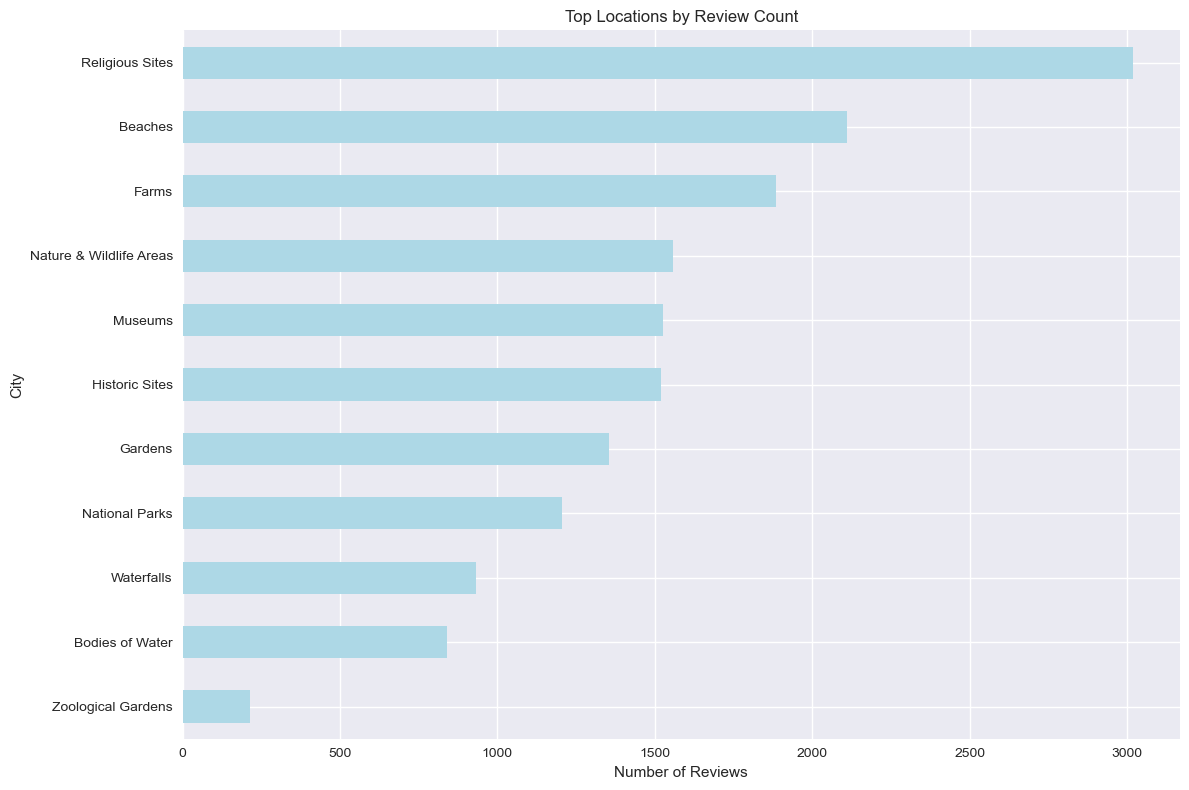

In [13]:
# Visualize top cities
plt.figure(figsize=(12, 8))
location_type_counts.plot(kind='barh', color='lightblue')
plt.title('Top Locations by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [10]:
# Analyze cities
print("Top 15 Cities by Review Count:")
print("-" * 50)
city_counts = df['Located_City'].value_counts().head(15)
for city, count in city_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{city}: {count:,} reviews ({percentage:.1f}%)")

print(f"\nTotal unique cities: {df['Located_City'].nunique()}")

Top 15 Cities by Review Count:
--------------------------------------------------
Nuwara Eliya: 2,221 reviews (13.7%)
Anuradhapura: 1,758 reviews (10.9%)
Kandy: 1,480 reviews (9.2%)
Colombo: 1,171 reviews (7.2%)
Sigiriya: 763 reviews (4.7%)
Habarana: 754 reviews (4.7%)
Hikkaduwa: 515 reviews (3.2%)
Galle: 511 reviews (3.2%)
Jaffna: 475 reviews (2.9%)
Ella: 471 reviews (2.9%)
Haputale: 409 reviews (2.5%)
Trincomalee: 409 reviews (2.5%)
Nilaveli: 371 reviews (2.3%)
Pinnawala: 369 reviews (2.3%)
Peradeniya: 337 reviews (2.1%)

Total unique cities: 36


City Visualization

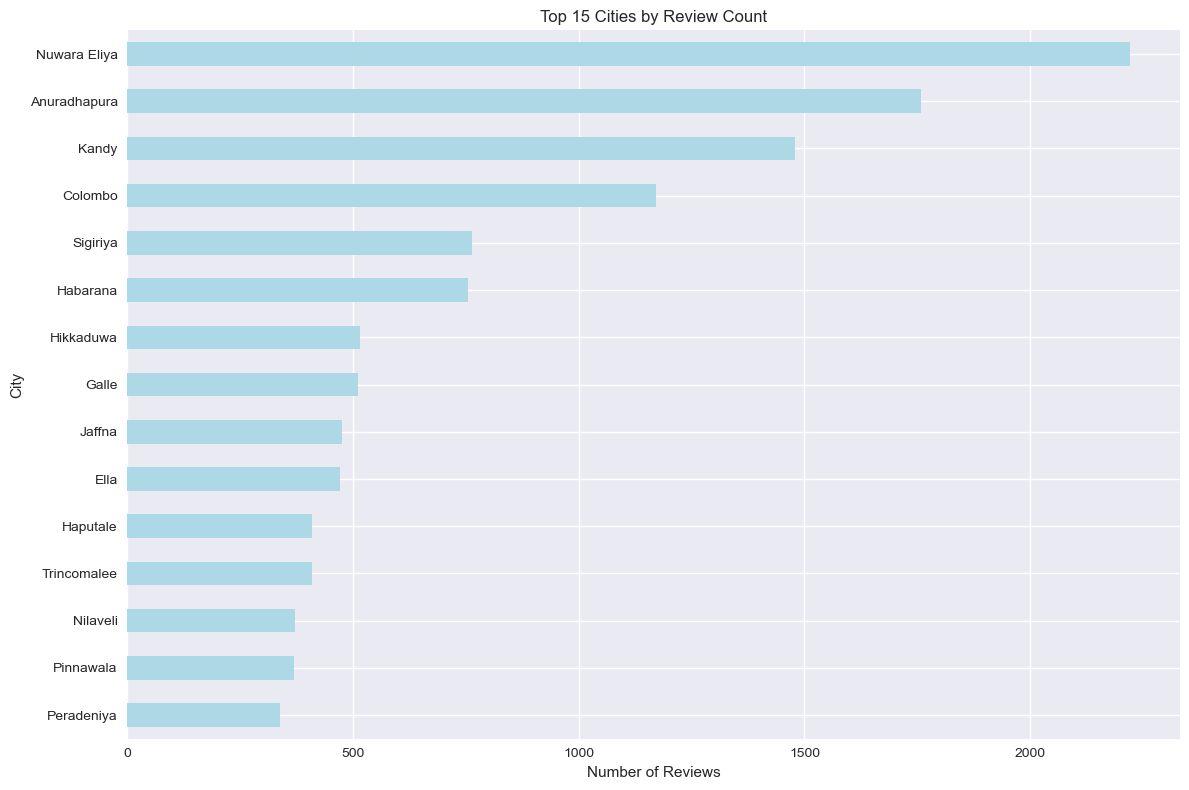

In [11]:
# Visualize top cities
plt.figure(figsize=(12, 8))
city_counts.plot(kind='barh', color='lightblue')
plt.title('Top 15 Cities by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

User Location Analysis

In [14]:
# Analyze user locations
print("Top 15 User Locations:")
print("-" * 50)
user_location_counts = df['User_Location'].value_counts().head(15)
for location, count in user_location_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{location}: {count:,} reviews ({percentage:.1f}%)")

print(f"\nTotal unique user locations: {df['User_Location'].nunique()}")

Top 15 User Locations:
--------------------------------------------------
London, United Kingdom: 950 reviews (5.9%)
Melbourne, Australia: 476 reviews (2.9%)
Sydney, Australia: 329 reviews (2.0%)
Mumbai, India: 316 reviews (2.0%)
Bengaluru, India: 293 reviews (1.8%)
Singapore, Singapore: 288 reviews (1.8%)
Dubai, United Arab Emirates: 280 reviews (1.7%)
New Delhi, India: 182 reviews (1.1%)
Brisbane, Australia: 132 reviews (0.8%)
Perth, Australia: 112 reviews (0.7%)
Hong Kong, China: 109 reviews (0.7%)
Doha, Qatar: 99 reviews (0.6%)
Chennai (Madras), India: 96 reviews (0.6%)
Kuala Lumpur, Malaysia: 95 reviews (0.6%)
Manchester, United Kingdom: 94 reviews (0.6%)

Total unique user locations: 3341


User Contributions Analysis

In [15]:
# Analyze user contributions
print("User Contributions Statistics:")
print("-" * 50)
print(f"Average contributions: {df['User_Contributions'].mean():.1f}")
print(f"Median contributions: {df['User_Contributions'].median():.0f}")
print(f"Min contributions: {df['User_Contributions'].min()}")
print(f"Max contributions: {df['User_Contributions'].max()}")

# Categorize users by contribution level
df['user_experience'] = pd.cut(df['User_Contributions'], 
                               bins=[0, 1, 10, 50, 100, float('inf')],
                               labels=['New', 'Occasional', 'Regular', 'Experienced', 'Expert'])

experience_counts = df['user_experience'].value_counts()
print("\nUser Experience Levels:")
for level, count in experience_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{level}: {count:,} users ({percentage:.1f}%)")

User Contributions Statistics:
--------------------------------------------------
Average contributions: 191.6
Median contributions: 54
Min contributions: 1
Max contributions: 9010

User Experience Levels:
Expert: 5,659 users (35.0%)
Regular: 5,145 users (31.8%)
Experienced: 2,771 users (17.2%)
Occasional: 2,430 users (15.0%)
New: 151 users (0.9%)


Experiential Keywords Definition

In [16]:
# Define keywords for each experiential dimension
experiential_keywords = {
    'Regenerative & Eco-Tourism': [
        'eco', 'sustainable', 'environmental', 'community', 'local', 'organic',
        'conservation', 'green', 'renewable', 'village', 'traditional', 'culture'
    ],
    'Integrated Wellness': [
        'wellness', 'spa', 'yoga', 'meditation', 'ayurveda', 'relax', 'peaceful',
        'tranquil', 'healing', 'therapy', 'massage', 'retreat', 'mindfulness'
    ],
    'Immersive Culinary': [
        'food', 'cuisine', 'restaurant', 'cooking', 'chef', 'taste', 'delicious',
        'authentic', 'local food', 'spices', 'curry', 'rice', 'seafood', 'market'
    ],
    'Off-the-Beaten-Path Adventure': [
        'adventure', 'hiking', 'trekking', 'wildlife', 'safari', 'nature', 'explore',
        'remote', 'off the beaten path', 'jungle', 'forest', 'mountain', 'river'
    ]
}

Keyword Analysis Function

In [17]:
# Function to count keyword occurrences
def count_keywords(text, keywords):
    if pd.isna(text):
        return 0
    text_lower = text.lower()
    count = 0
    for keyword in keywords:
        count += text_lower.count(keyword.lower())
    return count

# Count keywords for each dimension
for dimension, keywords in experiential_keywords.items():
    df[f'{dimension}_keyword_count'] = df['Text'].apply(lambda x: count_keywords(x, keywords))

Keyword Analysis Results

In [23]:
# Analyze keyword distribution
print("Keyword Analysis for Experiential Dimensions:")
print("=" * 60)

for dimension, keywords in experiential_keywords.items():
    col_name = f'{dimension}_keyword_count'
    total_occurrences = df[col_name].sum()
    reviews_with_keywords = (df[col_name] > 0).sum()
    percentage = (reviews_with_keywords / len(df)) * 100
    
    print(f"\n{dimension}:")
    print(f"  Total keyword occurrences: {total_occurrences:,}")
    print(f"  Reviews with keywords: {reviews_with_keywords:,} ({percentage:.1f}%)")


Keyword Analysis for Experiential Dimensions:

Regenerative & Eco-Tourism:
  Total keyword occurrences: 5,148
  Reviews with keywords: 4,012 (24.8%)

Integrated Wellness:
  Total keyword occurrences: 1,704
  Reviews with keywords: 1,497 (9.3%)

Immersive Culinary:
  Total keyword occurrences: 3,600
  Reviews with keywords: 2,525 (15.6%)

Off-the-Beaten-Path Adventure:
  Total keyword occurrences: 5,168
  Reviews with keywords: 3,118 (19.3%)


Keyword Distribution Visualization

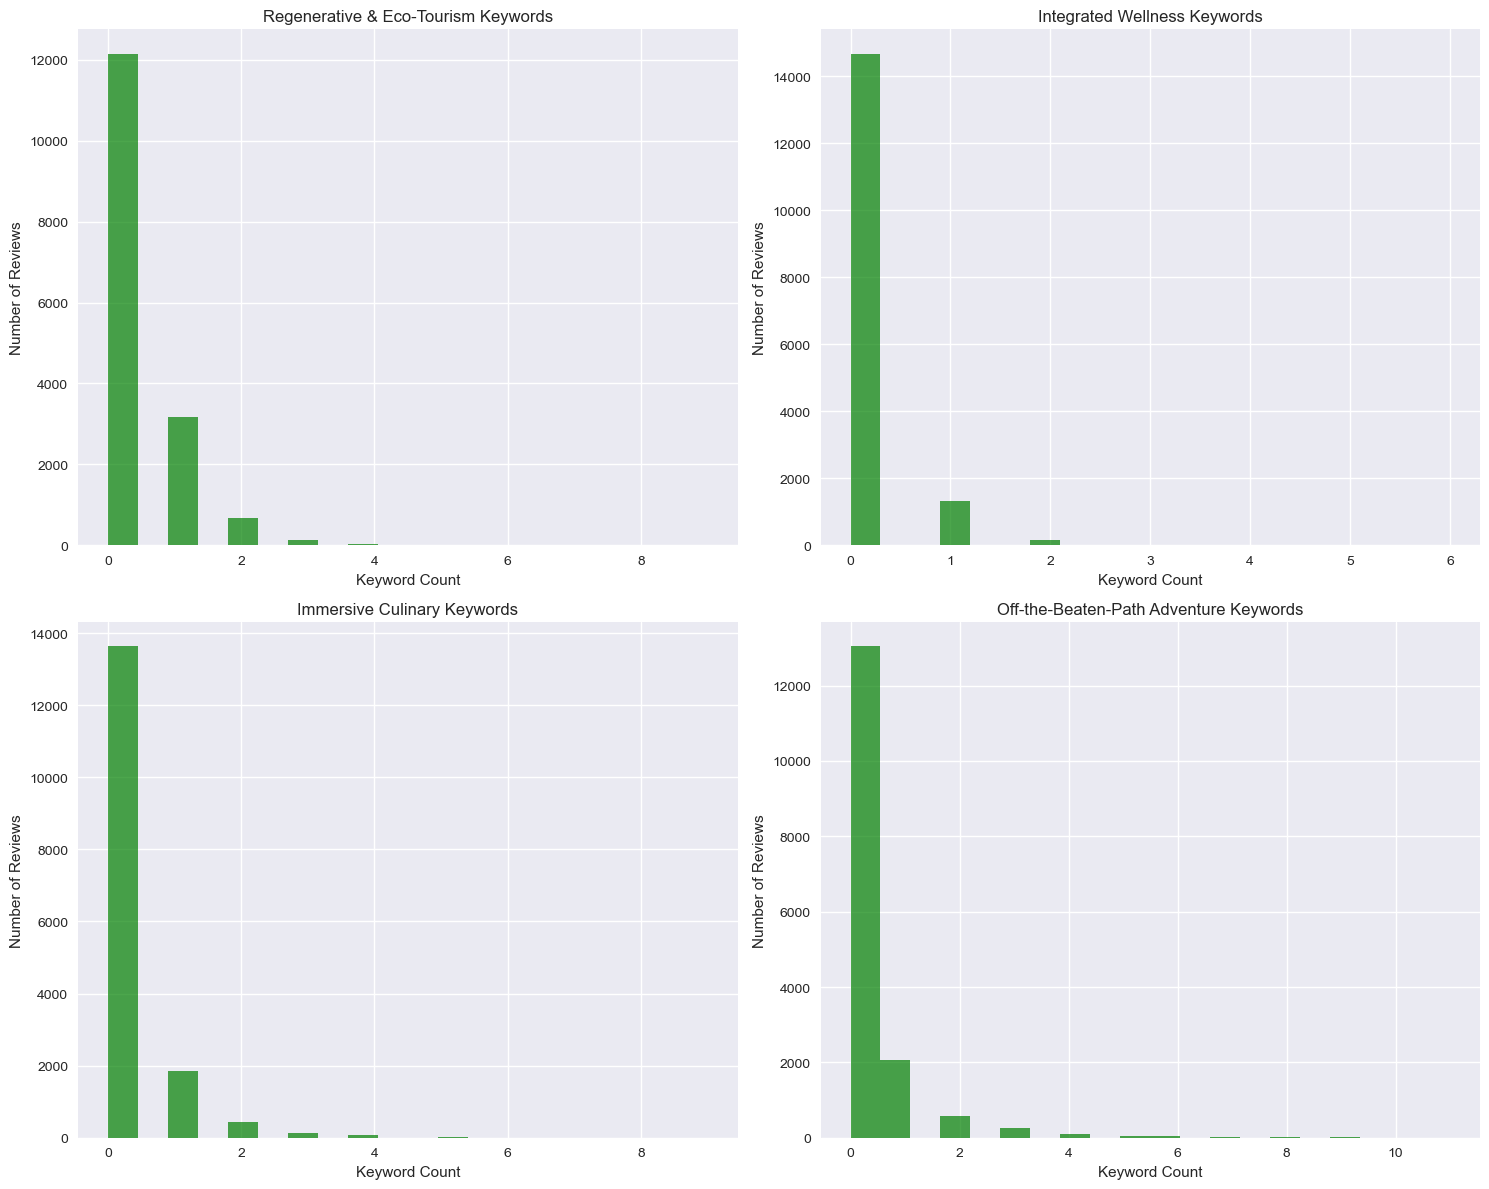

In [25]:
# Visualize keyword distribution
keyword_cols = [col for col in df.columns if 'keyword_count' in col]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, col in enumerate(keyword_cols):
    row, col_idx = i // 2, i % 2
    
    # Histogram of keyword counts
    axes[row, col_idx].hist(df[col], bins=20, alpha=0.7, color='green')
    axes[row, col_idx].set_title(f'{col.replace("_keyword_count", "")} Keywords')
    axes[row, col_idx].set_xlabel('Keyword Count')
    axes[row, col_idx].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

Word Cloud Function

In [26]:
# Create word clouds for different rating levels
def create_wordcloud(text_data, title):
    # Combine all text
    text = ' '.join(text_data.dropna())
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         max_words=100,
                         colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

Word Cloud Analysis

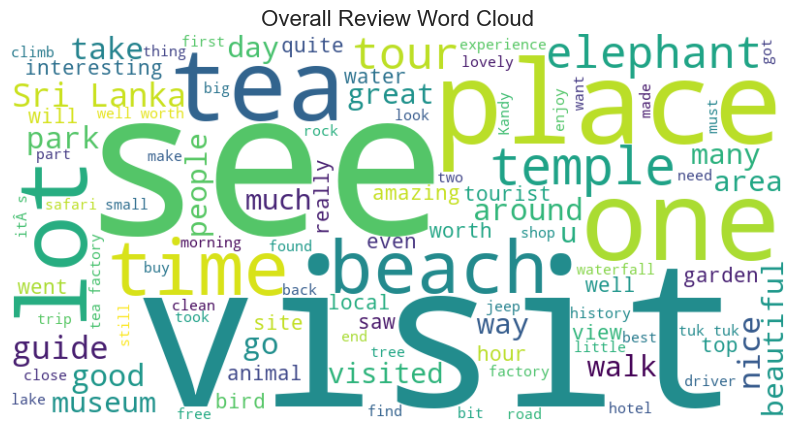

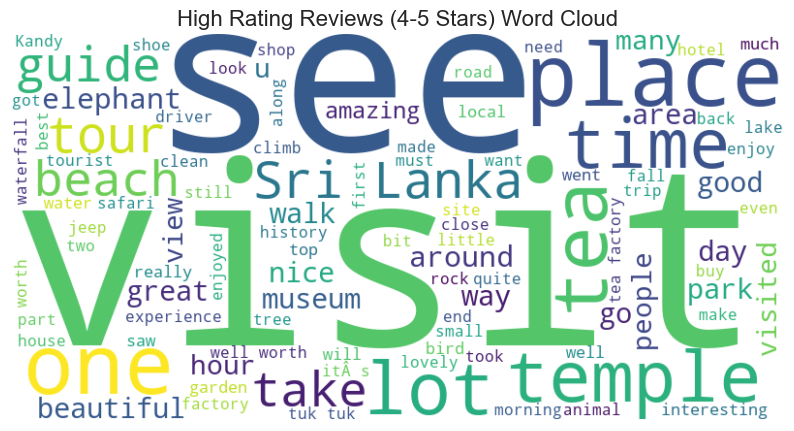

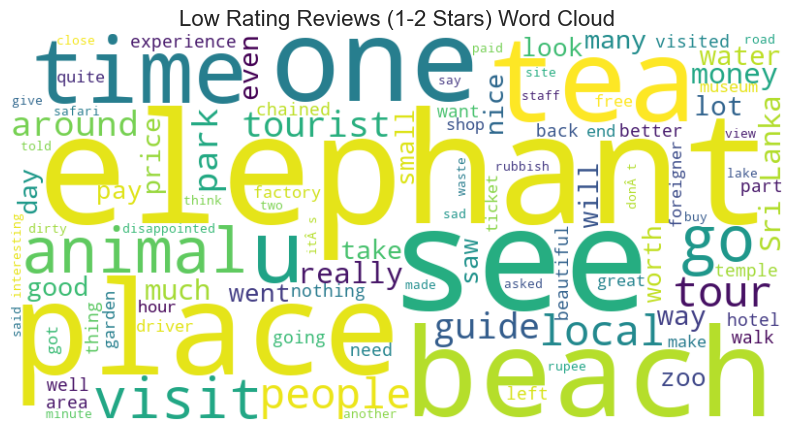

In [27]:
# Overall word cloud
create_wordcloud(df['Text'], 'Overall Review Word Cloud')

# High rating reviews (4-5 stars)
high_rating_text = df[df['Rating'].isin([4, 5])]['Text']
create_wordcloud(high_rating_text, 'High Rating Reviews (4-5 Stars) Word Cloud')

# Low rating reviews (1-2 stars)
low_rating_text = df[df['Rating'].isin([1, 2])]['Text']
create_wordcloud(low_rating_text, 'Low Rating Reviews (1-2 Stars) Word Cloud')